# Analyse der Zensusdaten bzw. des Stimmanteils der Grünen bei der BTW 2025 in Rheinland-Pfalz 

Die Auswertung der absoluten Zahlen ist aufgrund der Unterschiedlichkeit der Landkreise leider nicht zielführend. Wir verwenden also eher Anteilswerte (auch, wenn dann keine tobler Regression möglich ist zur Interpolation)

In [46]:
from statsmodels.othermod import betareg
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import OneHotEncoder
import matplotlib as mpl
from tobler.model import glm
from tobler.area_weighted import area_interpolate
from tobler.pycno import pycno_interpolate

import folium 
from folium.features import GeoJsonTooltip
import branca.colormap as cm


In [13]:
# Laden der Daten, die wir in data_editing_absolut.py 
# bzw. _anteile.py zusammengestellt haben

# Landkreis-Struktur
zensus_landkreise_geo = gpd.read_file("editing_ergebnis/zensus_landkreise_anteile.gpkg")
# 1-qkm-Grid
zensus_1km_rlp = gpd.read_file("editing_ergebnis/zensus_1km_rlp_anteile.gpkg")
zensus_1km_df = pd.read_csv("editing_ergebnis/Zensus2022_Landkreise.csv")

<Axes: >

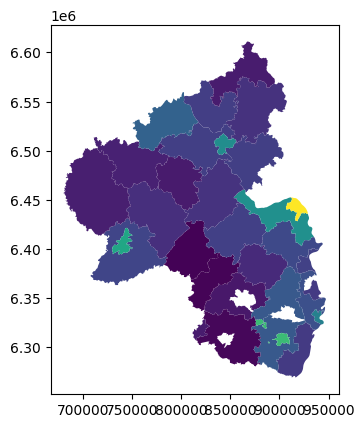

In [3]:
rheinland_pfalz = gpd.read_file("SHP_BTW2025/23_LK_1_BTW2025.shp")
rheinland_pfalz.to_crs(zensus_1km_rlp.crs, inplace=True)

zensus_landkreise_rlp = zensus_landkreise_geo.clip(rheinland_pfalz)

zensus_landkreise_rlp.plot(column="GRUENE_Anteil")

In [4]:
intensive_cols = [
 'Biomasse/Biogas',
 'Personen 18 - 29 Jahre',
 'Personen 30 - 49 Jahre',
 'Gebäude ab 1949 bis 1978',
 'Blockheizung',
 'Durchschnittliche Nettokaltmiete/qm',
 'Heizöl',
 'Einzel-/ Mehrraumöfen',
 'Einwohner',
 'Zentralheizung',
 'Durchschnittliche Haushaltsgröße',
 'Fernwärme',
 'kein Energieträger',
 'Solar/Geothermie/Wärmepumpe',
 'Gebäude ab 2001 bis 2010',
 'Gebäude ab 2011 bis 2019',
 'Ausländeranteil',
 'Etagenheizung',
 'Personen 65 Jahre und älter',
 'Personen 50 - 64 Jahre',
 'Gebäude ab 1919 bis 1948',
 'Strom',
 'Leerstandsquote',
 'Gas',
 'Kohle',
 'Gebäude ab 1979 bis 1990',
 'Fernheizung',
 'Gebäude ab 2020 und später',
 'Eigentümerquote',
 'Gebäude ab 1991 bis 2000',
 'Holz/Holzpellets', "GRUENE_Anteil"]

extensive_cols = ["Einwohnerdichte", "GRUENE"]


/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: GRUENE, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Biomasse/Biogas, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Personen 18 - 29 Jahre, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: Personen 30 - 49 Jahre, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
/home/patri

<Axes: >

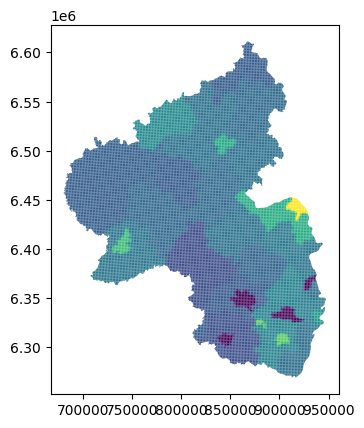

In [6]:
test1 = area_interpolate(source_df = zensus_landkreise_geo, 
                         target_df=zensus_1km_rlp, n_jobs=3, 
                         intensive_variables=intensive_cols,
                         extensive_variables=extensive_cols)

test1.plot(column="GRUENE_Anteil")

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: RuntimeWarning: divide by zero encountered in scalar divide
  correct = (val - nansum(data[mask])) / mask.sum()
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  correct = val / nansum(data[mask])
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: RuntimeWarning: divide by zero encountered in scalar divide
  correct = (val - nansum(data[mask])) / mask.sum()
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:146: RuntimeWarning: divide by zero encountered in scalar divide
  correct = val / nansum(data[mask])
/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/pycno/pycno.py:135: Ru

<Axes: >

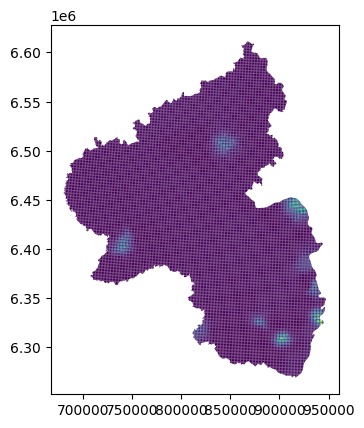

In [9]:

test2 = pycno_interpolate(source_df = zensus_landkreise_rlp, 
                         target_df=zensus_1km_rlp, 
                         variables= intensive_cols+extensive_cols, cellsize=1000)

test2.plot(column="GRUENE_Anteil")

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

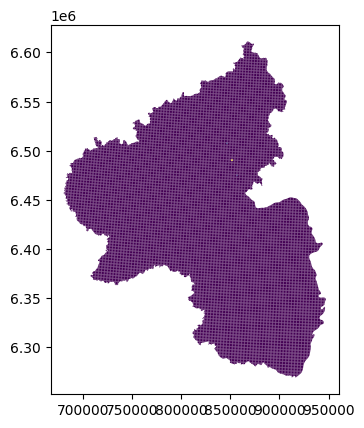

In [24]:
geo_spalten = ['Shape_Leng', 'Shape_Area', 'geometry']
covariates = extensive_cols + intensive_cols + geo_spalten
covariates.remove("GRUENE_Anteil") # Im Verhaeltnis mit der zu erklaerenden Variable, nicht im Zensus-1km-Datensatz enthalten
covariates.remove("Kohle") # Viele NAs
covariates.remove("Biomasse/Biogas") # # Viele NAs

test3, model = glm(source_df = zensus_landkreise_geo[covariates].dropna(), target_df = zensus_1km_rlp, 
                   variable="GRUENE",
                   raster="rasterdaten/rasterdaten_clipped.tif", likelihood = "poisson", return_model=True)


test3.plot(column="GRUENE")

Auffällig ist, dass wir überhaupt keine große farbliche Hervorhebung (auch nicht um Mainz herum) haben - dort, wo auf den Quadratkilometer eigentlich relativ viele Grünen-Wähler kommen sollten (absolut und auch relativ hohe Zahlen wären zu erwarten gewesen, da die Bevölkerungsdichte im Rhein-Main-Gebiet ja auch hoch ist). Daher lässt sich die Modell-Qualität in Zweifel ziehen.

In [25]:
model.summary()

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1891: RuntimeWarning: overflow encountered in exp
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 GRUENE   No. Observations:                   19
Model:                            GLM   Df Residuals:                       12
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0695e+05
Date:                Sun, 09 Nov 2025   Deviance:                   4.1369e+05
Time:                        09:44:22   Pearson chi2:                 3.85e+07
No. Iterations:                     8   Pseudo R-squ. (CS):               -inf
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
np.log1p(Type_21)     4.3588      0.009    481.928      0.000       4.341       4.377
np.log1p(Type_22)     4.1854      0.010    408.653      0.000       4.165       4.205
np.log1p(Type_23)    -4.2241      0.014   -303.111      0.000      -4.251      -4.197
np.log1p(Type_24)    -1.7959      0.011   -170.125      0.000      -1.817      -1.775
np.log1p(Type_41)     5.3988      0.016    334.965      0.000       5.367       5.430
np.log1p(Type_42)    -1.2036      0.007   -175.643      0.000      -1.217      -1.190
np.log1p(Type_52)    -3.2447      0.013   -253.440      0.000      -3.270      -3.220
=====================================================================================
"""

Offensichtlich hat das automatische Modell viele Beobachtungen herausgeworfen. Wir sollten uns daher auf andere Analysen fokussieren.

In [40]:
# Dasselbe Problem mit der perfekten Kollinearitaet
# wie im absoluten Fall
ars = 'Amtlicher Regionalschlüssel (ARS)__Code'
colinear = ['Personen unter 18 Jahren', 'keine Heizung', 'kein Energieträger', 'Gebäude vor 1919']
covariates2 = covariates.copy()
covariates2.remove("GRUENE")
for col in colinear:
    if col in covariates2:
        covariates2.remove(col)
for col in geo_spalten:
    if col in covariates2:
        covariates2.remove(col)

df = zensus_landkreise_geo[covariates2+["GRUENE_Anteil",ars]].dropna()
encoder = OneHotEncoder(sparse_output=False,min_frequency=7).fit(zensus_landkreise_geo[[ars]] // 1000)
encoded = encoder.transform(df[[ars]] // 1000)
encoded_rlp = encoder.transform(np.ones((zensus_1km_rlp.shape[0],1))*7)

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [41]:

model = betareg.BetaModel(endog = df["GRUENE_Anteil"].to_numpy(), 
                        exog = np.concat([encoded, df[covariates2]], axis=1), 
                        exog_precision=np.ones((df.shape[0],1)))
result = model.fit()
zensus_1km_rlp["prediction"] = result.predict(
    exog_precision=np.ones((zensus_1km_rlp.shape[0],1)),
    exog=np.concat([encoded_rlp, zensus_1km_rlp[covariates2]], 
              axis=1))

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

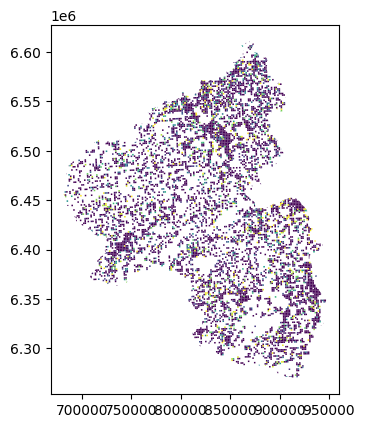

In [43]:
zensus_1km_rlp.plot("prediction")

/home/patricia/Schreibtisch/Projekte/Hackathon Gruene/.venv/lib/python3.12/site-packages/tobler/util/util.py:60: UserWarning: nan values in variable: prediction, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")


<Axes: >

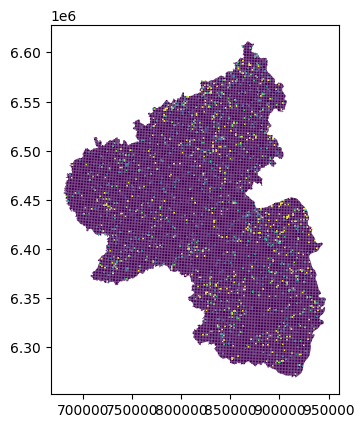

In [44]:
test4 = area_interpolate(zensus_1km_rlp, zensus_1km_rlp, intensive_variables=["prediction"])
test4.plot(column="prediction")

In [ ]:

bounds = [[49.39, 6.1], [50.57, 7.6]]
m = folium.Map(location=[49.9, 7.0], zoom_start=8, max_bounds=True)
m.fit_bounds(bounds)

# Erstelle eine Farbskala (colormap) für die Werte zwischen 0 und 1

colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'], vmin=0, vmax=1)

# Funktion, um für jeden Eintrag die Farbe nach Attributwert zu bestimmen
def style_function(feature):
    val = feature['properties']['prediction']
    return {
        'fillColor': colormap(val),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }

# Füge GeoJSON-Layer mit Tooltip zur Karte hinzu, Tooltip zeigt Attribut beim Hover
tooltip = GeoJsonTooltip(fields=['prediction'],
                         aliases=['Stimmanteil:'],
                         localize=True)

folium.GeoJson(
    test4,
    style_function=style_function,
    tooltip=tooltip
).add_to(m)

# Füge eine Legende (Colorbar) hinzu
colormap.caption = 'Geschätzter Stimmanteil - GRÜNE'
colormap.add_to(m)

m.save("karte_1km_grid_rlp.html")

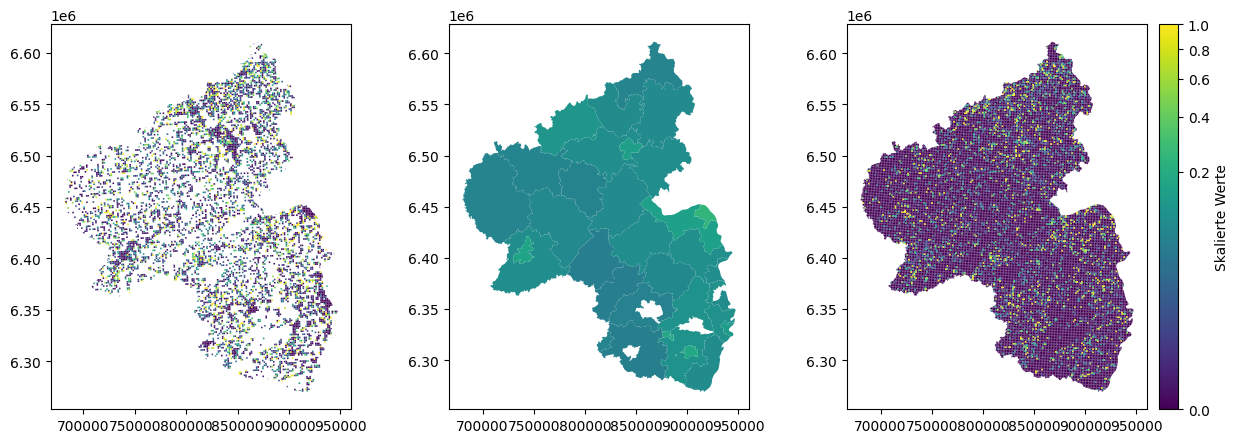

In [51]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Gemeinsame Normierung über alle Plots definieren (min/max aller Daten, z.B. aus deinen Spalten)
vmin = min(
    zensus_1km_rlp['prediction'].min(),
    zensus_landkreise_rlp['GRUENE_Anteil'].min(),
    test4['prediction'].min()
)
vmax = max(
    zensus_1km_rlp['prediction'].max(),
    zensus_landkreise_rlp['GRUENE_Anteil'].max(),
    test4['prediction'].max()
)

# Farbnorm erstellen
#norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
norm = mpl.colors.PowerNorm(gamma=0.3, vmin=0, vmax=1)  # gamma < 1 betont kleine Werte mehr

cmap = 'viridis'  # oder auf deinen Wunsch anpassen

# Erster Plot ohne eigene Farbskala, nur Kolorierung
zensus_1km_rlp.plot(column="prediction", cmap=cmap, norm=norm, ax=axes[0], legend=False)

# Zweiter Plot
zensus_landkreise_rlp.plot(column="GRUENE_Anteil", cmap=cmap, norm=norm, ax=axes[1], legend=False)

# Dritter Plot
test4.plot(column="prediction", cmap=cmap, norm=norm, ax=axes[2], legend=False)

# Gemeinsame Colorbar erstellen für die ganze Figur
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Dummy Array nötig für Colorbar

cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.01)
cbar.set_label('Skalierte Werte')

plt.show()
